# PyCaret 2 Classification Example
This notebook is created using PyCaret 2.0. Last updated : 28-07-2020

In [1]:
# check version
from pycaret.utils import version
version()

pycaret-nightly-0.39


# 1. Data Repository

In [2]:
from pycaret.datasets import get_data
index = get_data('index')

Dataset    Data Types                 Default Task  \
0           anomaly  Multivariate            Anomaly Detection   
1            france  Multivariate      Association Rule Mining   
2           germany  Multivariate      Association Rule Mining   
3              bank  Multivariate      Classification (Binary)   
4             blood  Multivariate      Classification (Binary)   
5            cancer  Multivariate      Classification (Binary)   
6            credit  Multivariate      Classification (Binary)   
7          diabetes  Multivariate      Classification (Binary)   
8   electrical_grid  Multivariate      Classification (Binary)   
9          employee  Multivariate      Classification (Binary)   
10            heart  Multivariate      Classification (Binary)   
11    heart_disease  Multivariate      Classification (Binary)   
12        hepatitis  Multivariate      Classification (Binary)   
13           income  Multivariate      Classification (Binary)   
14            juice  Multivariate      Classification (Binary)   
15              nba  Multivariate      Classification (Binary)   
16             wine  Multivariate      Classification (Binary)   
17        telescope  Multivariate      Classification (Binary)   
18            glass  Multivariate  Classification (Multiclass)   
19             iris  Multivariate  Classification (Multiclass)   
20            poker  Multivariate  Classification (Multiclass)   
21        questions  Multivariate  Classification (Multiclass)   
22        satellite  Multivariate  Classification (Multiclass)   
23         asia_gdp  Multivariate                   Clustering   
24        elections  Multivariate                   Clustering   
25         facebook  Multivariate                   Clustering   
26              ipl  Multivariate                   Clustering   
27        jewellery  Multivariate                   Clustering   
28             mice  Multivariate                   Clustering   
29        migration  Multivariate                   Clustering   
30          perfume  Multivariate                   Clustering   
31          pokemon  Multivariate                   Clustering   
32       population  Multivariate                   Clustering   
33    public_health  Multivariate                   Clustering   
34            seeds  Multivariate                   Clustering   
35        wholesale  Multivariate                   Clustering   
36           tweets          Text                          NLP   
37           amazon          Text         NLP / Classification   
38             kiva          Text         NLP / Classification   
39              spx          Text             NLP / Regression   
40        wikipedia          Text         NLP / Classification   
41       automobile  Multivariate                   Regression   
42             bike  Multivariate                   Regression   
43           boston  Multivariate                   Regression   
44         concrete  Multivariate                   Regression   
45          diamond  Multivariate                   Regression   
46           energy  Multivariate                   Regression   
47           forest  Multivariate                   Regression   
48             gold  Multivariate                   Regression   
49            house  Multivariate                   Regression   
50        insurance  Multivariate                   Regression   
51       parkinsons  Multivariate                   Regression   
52          traffic  Multivariate                   Regression   

                Target Variable  # Instances  # Attributes Missing Values  
0                          None         1000            10              N  
1        InvoiceNo, Description         8557             8              N  
2        InvoiceNo, Description         9495             8              N  
3                       deposit        45211            17              N  
4                         Class          748             5         

In [3]:
data = get_data('bank')

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome deposit  
0  unknown    5   may       261         1     -1         0  unknown      no  
1  unknown    5   may       151         1     -1         0  unknown      no  
2  unknown    5   may        76         1     -1         0  unknown      no  
3  unknown    5   may        92         1     -1         0  unknown      no  
4  unknown    5   may       198         1     -1         0  unknown      no

# 2. Initialize Setup

In [4]:
from pycaret.classification import *
clf1 = setup(data, target = 'deposit', session_id=123, log_experiment=True, experiment_name='bank1')

Setup Succesfully Completed!


# 3. Compare Baseline

In [5]:
best_model = compare_models()

# 4. Create Model

In [6]:
lr = create_model('lr')

In [7]:
dt = create_model('dt')

In [8]:
rf = create_model('rf', fold = 5)

In [9]:
models()

Name  \
ID                                          
lr                    Logistic Regression   
knn                K Neighbors Classifier   
nb                            Naive Bayes   
dt               Decision Tree Classifier   
svm                   SVM - Linear Kernel   
rbfsvm                SVM - Radial Kernel   
gpc           Gaussian Process Classifier   
mlp                        MLP Classifier   
ridge                    Ridge Classifier   
rf               Random Forest Classifier   
qda       Quadratic Discriminant Analysis   
ada                  Ada Boost Classifier   
gbc          Gradient Boosting Classifier   
lda          Linear Discriminant Analysis   
et                 Extra Trees Classifier   
xgboost         Extreme Gradient Boosting   
lightgbm  Light Gradient Boosting Machine   
catboost              CatBoost Classifier   

                                            Reference  Turbo  
ID                                                            
lr            sklearn.linear_model.LogisticRegression   True  
knn            sklearn.neighbors.KNeighborsClassifier   True  
nb                     sklearn.naive_bayes.GaussianNB   True  
dt                sklearn.tree.DecisionTreeClassifier   True  
svm                sklearn.linear_model.SGDClassifier   True  
rbfsvm                                sklearn.svm.SVC  False  
gpc                      sklearn.gaussian_process.GPC  False  
mlp              sklearn.neural_network.MLPClassifier  False  
ridge            sklearn.linear_model.RidgeClassifier   True  
rf            sklearn.ensemble.RandomForestClassifier   True  
qda                 sklearn.discriminant_analysis.QDA   True  
ada               sklearn.ensemble.AdaBoostClassifier   True  
gbc       sklearn.ensemble.GradientBoostingClassifier   True  
lda                 sklearn.discriminant_analysis.LDA   True  
et              sklearn.ensemble.ExtraTreesClassifier   True  
xgboost                        xgboost.readthedocs.io   True  
lightgbm                github.com/microsoft/LightGBM   True  
catboost                                  catboost.ai   True

In [10]:
models(type='ensemble').index.tolist()

['rf', 'ada', 'gbc', 'et', 'xgboost', 'lightgbm', 'catboost']

In [11]:
ensembled_models = compare_models(whitelist = models(type='ensemble').index.tolist(), fold = 3)

# 5. Tune Hyperparameters

In [12]:
tuned_lr = tune_model(lr)

In [13]:
tuned_rf = tune_model(rf)

# 6. Ensemble Model

In [14]:
bagged_dt = ensemble_model(dt)

In [15]:
boosted_dt = ensemble_model(dt, method = 'Boosting')

# 7. Blend Models

In [16]:
blender = blend_models(estimator_list = [boosted_dt, bagged_dt, tuned_rf], method = 'soft')

# 8. Stack Models

In [17]:
stacker = stack_models(estimator_list = [boosted_dt,bagged_dt,tuned_rf], meta_model=rf)

# 9. Analyze Model

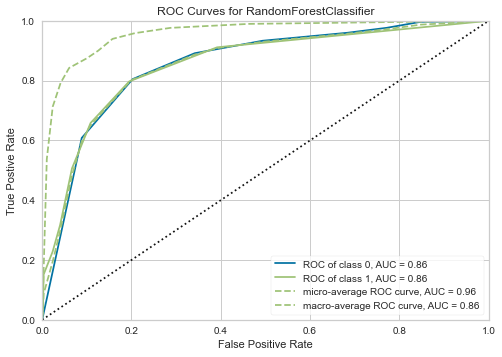

In [18]:
plot_model(rf)

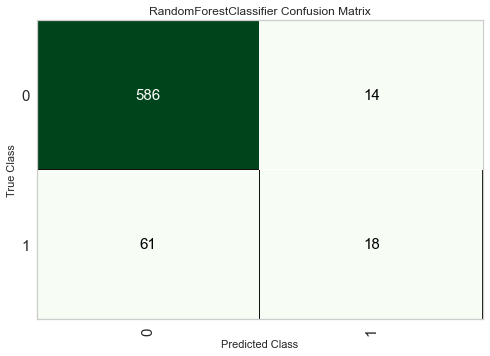

In [19]:
plot_model(rf, plot = 'confusion_matrix')

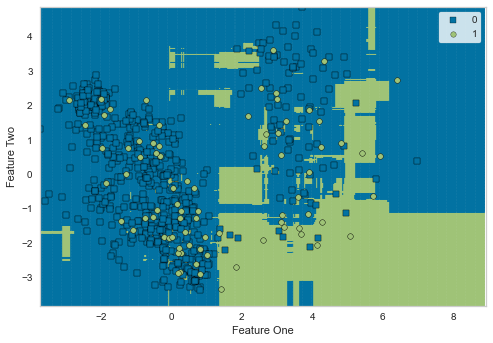

In [20]:
plot_model(rf, plot = 'boundary')

In [21]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 10. Interpret Model

In [22]:
catboost = create_model('catboost', cross_validation=False)

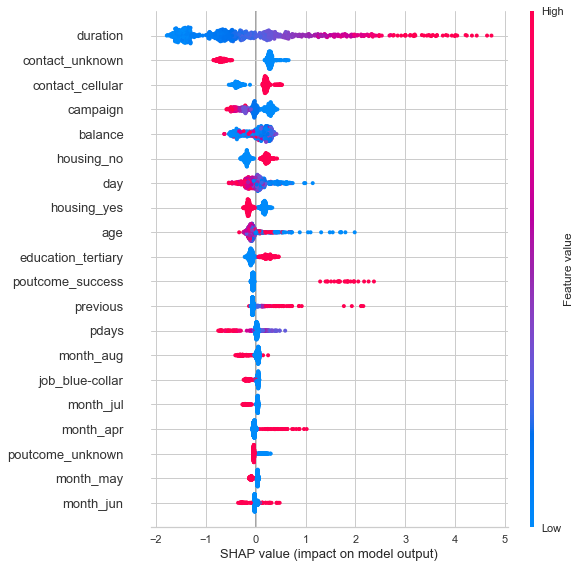

In [23]:
interpret_model(catboost)

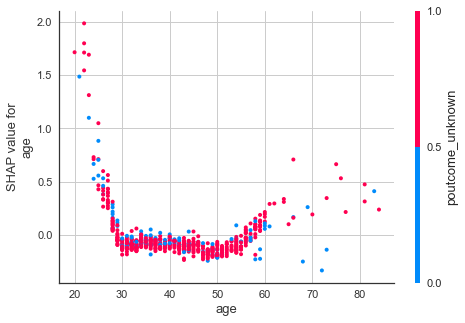

In [24]:
interpret_model(catboost, plot = 'correlation')

In [25]:
interpret_model(catboost, plot = 'reason', observation = 12)

# 11. AutoML()

In [26]:
best = automl(optimize = 'Recall')
best

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

# 12. Predict Model

In [27]:
pred_holdouts = predict_model(lr)
pred_holdouts.head()

Model  Accuracy     AUC  Recall   Prec.      F1   Kappa  \
0  Logistic Regression    0.8792  0.8683  0.1772  0.4516  0.2545  0.2022   

      MCC  
0  0.2287

age  balance   day  duration  campaign  pdays  previous  job_admin.  \
0  33.0  12704.0  21.0     246.0       2.0   -1.0       0.0         1.0   
1  51.0    730.0  18.0     287.0       2.0   -1.0       0.0         0.0   
2  50.0  19447.0  21.0     166.0       1.0   -1.0       0.0         0.0   
3  48.0    545.0   6.0     307.0       1.0   -1.0       0.0         0.0   
4  48.0    427.0  14.0     201.0       1.0   -1.0       0.0         0.0   

   job_blue-collar  job_entrepreneur  ...  month_nov  month_oct  month_sep  \
0              0.0               0.0  ...        1.0        0.0        0.0   
1              0.0               0.0  ...        1.0        0.0        0.0   
2              0.0               0.0  ...        1.0        0.0        0.0   
3              0.0               0.0  ...        0.0        0.0        0.0   
4              0.0               0.0  ...        0.0        0.0        0.0   

   poutcome_failure  poutcome_other  poutcome_success  poutcome_unknown  \
0               0.0             0.0               0.0               1.0   
1               0.0             0.0               0.0               1.0   
2               0.0             0.0               0.0               1.0   
3               0.0             0.0               0.0               1.0   
4               0.0             0.0               0.0               1.0   

   deposit  Label   Score  
0        0      0  0.0441  
1        0      0  0.0281  
2        0      0  0.0207  
3        0      0  0.0674  
4        0      0  0.0269  

[5 rows x 54 columns]

In [28]:
new_data = data.copy()
new_data.drop(['deposit'], axis=1, inplace=True)
predict_new = predict_model(best, data=new_data)
predict_new.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome  Label  \
0  unknown    5   may       261         1     -1         0  unknown      0   
1  unknown    5   may       151         1     -1         0  unknown      0   
2  unknown    5   may        76         1     -1         0  unknown      0   
3  unknown    5   may        92         1     -1         0  unknown      0   
4  unknown    5   may       198         1     -1         0  unknown      0   

   Score  
0    0.0  
1    0.0  
2    0.0  
3    0.0  
4    0.0

# 13. Save / Load Model

In [29]:
save_model(best, model_name='best-model')

Transformation Pipeline and Model Succesfully Saved


In [30]:
loaded_bestmodel = load_model('best-model')
print(loaded_bestmodel)

Transformation Pipeline and Model Sucessfully Loaded
[Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='deposit',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_Le...
                ('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),
                ('P_transform', Empty()), ('pt_target', Empty()),
                ('binn', Empty()), ('rem_outliers', Empty()),
                ('cluster_all', Empty()), ('dummy', Dummify(t

In [31]:
from sklearn import set_config
set_config(display='diagram')
loaded_bestmodel[0]

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='deposit',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_Le...
                ('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),
                ('P_transform', Empty()), ('pt_target', Empty()),
                ('binn', Empty()), ('rem_outliers', Empty()),
                ('cluster_all', Empty()), ('dummy', Dummify(target='deposit')),
                ('fix_perfect', Empty()), ('clean_names', Clean_Colum_Names()),
                ('feature_select', Empty()), ('fix_multi', Empty()),
                ('dfs', Empty()), ('pca', Empty())],
         verbose=False)

In [32]:
from sklearn import set_config
set_config(display='text')

# 14. Deploy Model

In [33]:
deploy_model(best, model_name = 'best-aws', authentication = {'bucket' : 'pycaret-test'})

Model Succesfully Deployed on AWS S3


# 15. Get Config / Set Config

In [34]:
X_train = get_config('X_train')
X_train.head()

age  balance   day  duration  campaign  pdays  previous  job_admin.  \
22860  32.0    230.0  25.0     256.0       8.0   -1.0       0.0         0.0   
45154  63.0   3738.0   9.0     301.0       1.0  456.0       4.0         0.0   
39204  56.0     95.0  18.0     428.0       2.0   -1.0       0.0         1.0   
38864  33.0    -52.0  18.0     278.0       1.0   -1.0       0.0         0.0   
22223  35.0    905.0  21.0     114.0       2.0   -1.0       0.0         0.0   

       job_blue-collar  job_entrepreneur  ...  month_jun  month_mar  \
22860              0.0               0.0  ...        0.0        0.0   
45154              0.0               0.0  ...        0.0        0.0   
39204              0.0               0.0  ...        0.0        0.0   
38864              0.0               0.0  ...        0.0        0.0   
22223              0.0               0.0  ...        0.0        0.0   

       month_may  month_nov  month_oct  month_sep  poutcome_failure  \
22860        0.0        0.0        0.0        0.0               0.0   
45154        0.0        1.0        0.0        0.0               1.0   
39204        1.0        0.0        0.0        0.0               0.0   
38864        1.0        0.0        0.0        0.0               0.0   
22223        0.0        0.0        0.0        0.0               0.0   

       poutcome_other  poutcome_success  poutcome_unknown  
22860             0.0               0.0               1.0  
45154             0.0               0.0               0.0  
39204             0.0               0.0               1.0  
38864             0.0               0.0               1.0  
22223             0.0               0.0               1.0  

[5 rows x 51 columns]

In [35]:
get_config('seed')

123

In [36]:
from pycaret.classification import set_config
set_config('seed', 999)

In [37]:
get_config('seed')

999

# 16. Get System Logs

In [38]:
get_system_logs()

['2020-07-28 21', '03', '39,795', 'INFO', 'PyCaret Classification Module']
['2020-07-28 21', '03', '39,795', 'INFO', 'version pycaret-nightly-0.39']
['2020-07-28 21', '03', '39,796', 'INFO', 'Initializing setup()']
['2020-07-28 21', '03', '39,796', 'INFO', 'USI', '86aa']
['2020-07-28 21', '03', '39,796', 'INFO', 'setup(data=(1070, 19), target=Purchase, train_size=0.7, sampling=True, sample_estimator=None, categorical_features=None, categorical_imputation=constant, ordinal_features=None,']
['high_cardinality_features=None, high_cardinality_method=frequency, numeric_features=None, numeric_imputation=mean, date_features=None, ignore_features=None, normalize=False,']
['normalize_method=zscore, transformation=False, transformation_method=yeo-johnson, handle_unknown_categorical=True, unknown_categorical_method=least_frequent, pca=False, pca_method=linear,']
['pca_components=None, ignore_low_variance=False, combine_rare_levels=False, rare_level_threshold=0.1, bin_numeric_features=None, remove

['time_features=[])),']
["('imputer',"]
["Simple_Imputer(categorical_strategy='not_available',"]
["numeric_strategy='mean',"]
['target_variable=None)),']
["('new_levels1',"]
['New_Catagorical_...']
["('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),"]
["('P_transform', Empty()), ('pt_target', Empty()),"]
["('binn', Empty()), ('rem_outliers', Empty()),"]
["('cluster_all', Empty()), ('dummy', Dummify(target='Purchase')),"]
["('fix_perfect', Empty()), ('clean_names', Clean_Colum_Names()),"]
["('feature_select', Empty()), ('fix_multi', Empty()),"]
["('dfs', Empty()), ('pca', Empty())],"]
['verbose=False), Pipeline(memory=None,']
["steps=[('dtypes',"]
['DataTypes_Auto_infer(categorical_features=[],']
['display_types=False, features_todrop=[],']
["ml_usecase='classification',"]
["numerical_features=[], target='Purchase',"]
['time_features=[])),']
["('imputer',"]
["Simple_Imputer(categorical_strategy='not_available',"]
["numeric_strategy='mean',"]
['target_variable=None)),']
["

['2020-07-28 21', '10', '28,794', 'INFO', 'Compiling Metrics']
['2020-07-28 21', '10', '28,799', 'INFO', 'Initializing Fold 8']
['2020-07-28 21', '10', '28,807', 'INFO', 'Fitting Model']
['2020-07-28 21', '10', '29,189', 'INFO', 'Evaluating Metrics']
['2020-07-28 21', '10', '29,189', 'WARNING', 'model has no predict_proba attribute. pred_prob set to 0.00']
['2020-07-28 21', '10', '29,193', 'WARNING', 'model has no predict_proba attribute. AUC set to 0.00']
['2020-07-28 21', '10', '29,196', 'INFO', 'Compiling Metrics']
['2020-07-28 21', '10', '29,199', 'INFO', 'Initializing Fold 9']
['2020-07-28 21', '10', '29,206', 'INFO', 'Fitting Model']
['2020-07-28 21', '10', '29,648', 'INFO', 'Evaluating Metrics']
['2020-07-28 21', '10', '29,648', 'WARNING', 'model has no predict_proba attribute. pred_prob set to 0.00']
['2020-07-28 21', '10', '29,652', 'WARNING', 'model has no predict_proba attribute. AUC set to 0.00']
['2020-07-28 21', '10', '29,654', 'INFO', 'Compiling Metrics']
['2020-07-28 21

['2020-07-28 21', '10', '31,457', 'INFO', 'Compiling Metrics']
['2020-07-28 21', '10', '31,467', 'INFO', 'Initializing Fold 2']
['2020-07-28 21', '10', '31,478', 'INFO', 'Fitting Model']
['2020-07-28 21', '10', '31,597', 'INFO', 'Evaluating Metrics']
['2020-07-28 21', '10', '31,858', 'INFO', 'Compiling Metrics']
['2020-07-28 21', '10', '31,865', 'INFO', 'Initializing Fold 3']
['2020-07-28 21', '10', '31,876', 'INFO', 'Fitting Model']
['2020-07-28 21', '10', '31,995', 'INFO', 'Evaluating Metrics']
['2020-07-28 21', '10', '32,237', 'INFO', 'Compiling Metrics']
['2020-07-28 21', '10', '32,241', 'INFO', 'Initializing Fold 4']
['2020-07-28 21', '10', '32,249', 'INFO', 'Fitting Model']
['2020-07-28 21', '10', '32,365', 'INFO', 'Evaluating Metrics']
['2020-07-28 21', '10', '32,616', 'INFO', 'Compiling Metrics']
['2020-07-28 21', '10', '32,626', 'INFO', 'Initializing Fold 5']
['2020-07-28 21', '10', '32,636', 'INFO', 'Fitting Model']
['2020-07-28 21', '10', '32,755', 'INFO', 'Evaluating Metric

['experiment_name=kiva_exp, log_plots=False, log_data=False, verbose=True)']
['2020-07-28 23', '41', '07,315', 'INFO', 'Checking environment']
['2020-07-28 23', '41', '07,315', 'INFO', 'python_version', '3.6.10']
['2020-07-28 23', '41', '07,315', 'INFO', 'python_build', "('default', 'May  7 2020 19", '46', "08')"]
['2020-07-28 23', '41', '07,315', 'INFO', 'machine', 'AMD64']
['2020-07-28 23', '41', '07,316', 'INFO', 'platform', 'Windows-10-10.0.18362-SP0']
['2020-07-28 23', '41', '07,353', 'INFO', 'Memory', 'svmem(total=17032478720, available=9800212480, percent=42.5, used=7232266240, free=9800212480)']
['2020-07-28 23', '41', '07,353', 'INFO', 'Physical Core', '4']
['2020-07-28 23', '41', '07,353', 'INFO', 'Logical Core', '8']
['2020-07-28 23', '41', '07,353', 'INFO', 'Checking libraries']
['2020-07-28 23', '41', '07,353', 'INFO', 'pd==1.0.4']
['2020-07-28 23', '41', '07,353', 'INFO', 'numpy==1.18.5']
['2020-07-28 23', '41', '07,526', 'INFO', 'PyCaret NLP Module']
['2020-07-28 23', '4

['2020-07-28 23', '41', '20,566', 'INFO', 'Tokenizing Words']
['2020-07-28 23', '41', '22,657', 'INFO', 'Removing stopwords']
['2020-07-28 23', '41', '22,994', 'INFO', 'Removing stopwords']
['2020-07-28 23', '41', '25,647', 'INFO', 'Removing stopwords']
['2020-07-28 23', '41', '26,316', 'INFO', 'Extracting Bigrams']
['2020-07-28 23', '41', '26,828', 'INFO', 'Extracting Bigrams']
['2020-07-28 23', '41', '26,959', 'INFO', 'Removing stopwords']
['2020-07-28 23', '41', '29,724', 'INFO', 'Extracting Bigrams']
['2020-07-28 23', '41', '30,820', 'INFO', 'Extracting Bigrams']
['2020-07-28 23', '41', '36,263', 'INFO', 'Extracting Trigrams']
['2020-07-28 23', '41', '38,045', 'INFO', 'Extracting Trigrams']
['2020-07-28 23', '41', '40,685', 'INFO', 'Extracting Trigrams']
['2020-07-28 23', '41', '42,550', 'INFO', 'Extracting Trigrams']
['2020-07-28 23', '41', '55,757', 'INFO', 'Lemmatizing tokens']
['2020-07-28 23', '41', '57,518', 'INFO', 'Lemmatizing tokens']
['2020-07-28 23', '42', '00,239', 'INF

['2020-07-29 00', '00', '43,850', 'INFO', 'Copying training dataset']
['2020-07-29 00', '00', '43,851', 'INFO', 'Importing stopwords from nltk']
['2020-07-29 00', '00', '44,125', 'INFO', 'No custom stopwords defined']
['2020-07-29 00', '00', '44,125', 'INFO', 'Removing numeric characters from the text']
['2020-07-29 00', '00', '44,128', 'INFO', 'No custom stopwords defined']
['2020-07-29 00', '00', '44,128', 'INFO', 'Removing numeric characters from the text']
['2020-07-29 00', '00', '44,430', 'INFO', 'Removing special characters from the text']
['2020-07-29 00', '00', '44,516', 'INFO', 'Removing special characters from the text']
['2020-07-29 00', '00', '44,768', 'INFO', 'Compiling processed text']
['2020-07-29 00', '00', '44,794', 'INFO', 'Compiling information grid']
['2020-07-29 00', '00', '44,832', 'INFO', 'gensim==3.8.3']
['2020-07-29 00', '00', '45,310', 'INFO', 'Creating MLFlow logs']
['2020-07-29 00', '00', '45,429', 'INFO', 'spacy==2.2.4']
['2020-07-29 00', '00', '45,791', 'I

['2020-07-29 00', '02', '49,595', 'INFO', 'pd==1.0.4']
['2020-07-29 00', '02', '49,595', 'INFO', 'numpy==1.18.5']
['2020-07-29 00', '02', '49,853', 'INFO', 'Creating MLFlow logs']
['2020-07-29 00', '02', '50,199', 'INFO', 'spacy==2.2.4']
['2020-07-29 00', '02', '50,297', 'INFO', 'setup() succesfully completed......................................']
['2020-07-29 00', '02', '50,297', 'INFO', 'Initializing create_model()']
['2020-07-29 00', '02', '50,297', 'INFO', 'create_model(model=lda, multi_core=True, num_topics=None, verbose=True, system=True)']
['2020-07-29 00', '02', '50,298', 'INFO', 'Checking exceptions']
['2020-07-29 00', '02', '50,298', 'INFO', 'Preloading libraries']
['2020-07-29 00', '02', '50,298', 'INFO', 'Preparing display monitor']
['2020-07-29 00', '02', '50,307', 'INFO', 'Defining topic model']
['2020-07-29 00', '02', '50,307', 'INFO', 'Model', 'Latent Dirichlet Allocation']
['2020-07-29 00', '02', '50,307', 'INFO', 'Defining num_topics parameter']
['2020-07-29 00', '02

['2020-07-29 00', '22', '19,824', 'INFO', 'Initializing create_model()']
['2020-07-29 00', '22', '19,824', 'INFO', 'create_model(model=lda, multi_core=True, num_topics=None, verbose=True, system=True)']
['2020-07-29 00', '22', '19,824', 'INFO', 'Checking exceptions']
['2020-07-29 00', '22', '19,824', 'INFO', 'Preloading libraries']
['2020-07-29 00', '22', '19,824', 'INFO', 'Preparing display monitor']
['2020-07-29 00', '22', '19,835', 'INFO', 'Defining topic model']
['2020-07-29 00', '22', '19,835', 'INFO', 'Model', 'Latent Dirichlet Allocation']
['2020-07-29 00', '22', '19,835', 'INFO', 'Defining num_topics parameter']
['2020-07-29 00', '22', '19,835', 'INFO', 'num_topics set to', '4']
['2020-07-29 00', '22', '19,835', 'INFO', 'LDA multi_core enabled']
['2020-07-29 00', '22', '19,836', 'INFO', 'LdaMulticore imported successfully']
['2020-07-29 00', '22', '22,847', 'INFO', 'PyCaret NLP Module']
['2020-07-29 00', '22', '22,847', 'INFO', 'version pycaret-nightly-0.39']
['2020-07-29 00', 

['2020-07-29 00', '24', '26,234', 'INFO', 'LdaMulticore imported successfully']
['2020-07-29 00', '24', '26,312', 'INFO', 'Removing stopwords after lemmatizing']
['2020-07-29 00', '24', '28,064', 'INFO', 'Compiling processed text']
['2020-07-29 00', '24', '28,081', 'INFO', 'Compiling information grid']
['2020-07-29 00', '24', '28,307', 'INFO', 'Creating corpus and dictionary']
['2020-07-29 00', '24', '28,571', 'INFO', 'Creating MLFlow logs']
['2020-07-29 00', '24', '29,045', 'INFO', 'setup() succesfully completed......................................']
['2020-07-29 00', '24', '29,046', 'INFO', 'Initializing create_model()']
['2020-07-29 00', '24', '29,046', 'INFO', 'create_model(model=lda, multi_core=True, num_topics=None, verbose=True, system=True)']
['2020-07-29 00', '24', '29,046', 'INFO', 'Checking exceptions']
['2020-07-29 00', '24', '29,046', 'INFO', 'Preloading libraries']
['2020-07-29 00', '24', '29,046', 'INFO', 'Preparing display monitor']
['2020-07-29 00', '24', '29,056', 'I

['2020-07-29 00', '42', '01,515', 'INFO', 'version pycaret-nightly-0.39']
['2020-07-29 00', '42', '01,515', 'INFO', 'Initializing setup()']
['2020-07-29 00', '42', '01,515', 'INFO', 'USI', '744f']
['2020-07-29 00', '42', '01,515', 'INFO', 'setup(data=(6818, 7), target=en, custom_stopwords=None, html=False, session_id=None, log_experiment=True,']
['experiment_name=kiva_exp, log_plots=False, log_data=False, verbose=True)']
['2020-07-29 00', '42', '01,515', 'INFO', 'Checking environment']
['2020-07-29 00', '42', '01,515', 'INFO', 'python_version', '3.6.10']
['2020-07-29 00', '42', '01,515', 'INFO', 'python_build', "('default', 'May  7 2020 19", '46', "08')"]
['2020-07-29 00', '42', '01,515', 'INFO', 'machine', 'AMD64']
['2020-07-29 00', '42', '01,516', 'INFO', 'platform', 'Windows-10-10.0.18362-SP0']
['2020-07-29 00', '42', '01,549', 'INFO', 'Memory', 'svmem(total=17032478720, available=9733312512, percent=42.9, used=7299166208, free=9733312512)']
['2020-07-29 00', '42', '01,549', 'INFO',

['2020-07-29 00', '46', '21,748', 'INFO', 'Logical Core', '8']
['2020-07-29 00', '46', '21,748', 'INFO', 'Checking libraries']
['2020-07-29 00', '46', '21,748', 'INFO', 'pd==1.0.4']
['2020-07-29 00', '46', '21,748', 'INFO', 'numpy==1.18.5']
['2020-07-29 00', '46', '23,111', 'INFO', 'gensim==3.8.3']
['2020-07-29 00', '46', '23,764', 'INFO', 'spacy==2.2.4']
['2020-07-29 00', '46', '23,911', 'INFO', 'Compiling processed text']
['2020-07-29 00', '46', '23,935', 'INFO', 'Compiling information grid']
['2020-07-29 00', '46', '24,475', 'INFO', 'Creating MLFlow logs']
['2020-07-29 00', '46', '24,564', 'INFO', 'nltk==3.5']
['2020-07-29 00', '46', '24,618', 'INFO', 'textblob==0.15.3']
['2020-07-29 00', '46', '24,993', 'INFO', 'setup() succesfully completed......................................']
['2020-07-29 00', '46', '24,993', 'INFO', 'Initializing create_model()']
['2020-07-29 00', '46', '24,993', 'INFO', 'create_model(model=lda, multi_core=True, num_topics=None, verbose=True, system=True)']
[

['2020-07-29 01', '03', '56,816', 'INFO', 'Model', 'Latent Dirichlet Allocation']
['2020-07-29 01', '03', '56,816', 'INFO', 'Defining num_topics parameter']
['2020-07-29 01', '03', '56,816', 'INFO', 'num_topics set to', '4']
['2020-07-29 01', '03', '56,817', 'INFO', 'LDA multi_core enabled']
['2020-07-29 01', '03', '56,817', 'INFO', 'LdaMulticore imported successfully']
['2020-07-29 01', '03', '57,086', 'INFO', 'Compiling processed text']
['2020-07-29 01', '03', '57,111', 'INFO', 'Compiling information grid']
['2020-07-29 01', '03', '57,386', 'INFO', 'mlflow==1.8.0']
['2020-07-29 01', '03', '57,387', 'INFO', 'Checking Exceptions']
['2020-07-29 01', '03', '57,677', 'INFO', 'Creating MLFlow logs']
['2020-07-29 01', '03', '58,184', 'INFO', 'setup() succesfully completed......................................']
['2020-07-29 01', '03', '58,185', 'INFO', 'Initializing create_model()']
['2020-07-29 01', '03', '58,185', 'INFO', 'create_model(model=lda, multi_core=True, num_topics=None, verbose=

['2020-07-29 01', '06', '03,409', 'INFO', 'Physical Core', '4']
['2020-07-29 01', '06', '03,409', 'INFO', 'Logical Core', '8']
['2020-07-29 01', '06', '03,409', 'INFO', 'Checking libraries']
['2020-07-29 01', '06', '03,409', 'INFO', 'pd==1.0.4']
['2020-07-29 01', '06', '03,409', 'INFO', 'numpy==1.18.5']
['2020-07-29 01', '06', '03,730', 'INFO', 'Creating corpus and dictionary']
['2020-07-29 01', '06', '04,295', 'INFO', 'Removing stopwords after lemmatizing']
['2020-07-29 01', '06', '04,739', 'INFO', 'gensim==3.8.3']
['2020-07-29 01', '06', '05,277', 'INFO', 'spacy==2.2.4']
['2020-07-29 01', '06', '05,400', 'INFO', 'Creating corpus and dictionary']
['2020-07-29 01', '06', '05,616', 'INFO', 'Compiling processed text']
['2020-07-29 01', '06', '05,640', 'INFO', 'Compiling information grid']
['2020-07-29 01', '06', '06,018', 'INFO', 'nltk==3.5']
['2020-07-29 01', '06', '06,077', 'INFO', 'textblob==0.15.3']
['2020-07-29 01', '06', '06,156', 'INFO', 'Creating MLFlow logs']
['2020-07-29 01', '

['2020-07-29 01', '23', '41,523', 'INFO', 'Initializing setup()']
['2020-07-29 01', '23', '41,523', 'INFO', 'USI', '0efc']
['2020-07-29 01', '23', '41,523', 'INFO', 'setup(data=(6818, 7), target=en, custom_stopwords=None, html=False, session_id=None, log_experiment=True,']
['experiment_name=kiva_exp, log_plots=False, log_data=False, verbose=True)']
['2020-07-29 01', '23', '41,523', 'INFO', 'Checking environment']
['2020-07-29 01', '23', '41,523', 'INFO', 'python_version', '3.6.10']
['2020-07-29 01', '23', '41,523', 'INFO', 'python_build', "('default', 'May  7 2020 19", '46', "08')"]
['2020-07-29 01', '23', '41,524', 'INFO', 'machine', 'AMD64']
['2020-07-29 01', '23', '41,524', 'INFO', 'platform', 'Windows-10-10.0.18362-SP0']
['2020-07-29 01', '23', '41,567', 'INFO', 'Memory', 'svmem(total=17032478720, available=9825554432, percent=42.3, used=7206924288, free=9825554432)']
['2020-07-29 01', '23', '41,567', 'INFO', 'Physical Core', '4']
['2020-07-29 01', '23', '41,567', 'INFO', 'Logical 

['2020-07-29 01', '25', '46,941', 'INFO', 'Preparing display monitor']
['2020-07-29 01', '25', '46,953', 'INFO', 'Importing libraries']
['2020-07-29 01', '25', '46,953', 'INFO', 'Declaring global variables']
['2020-07-29 01', '25', '46,953', 'INFO', 'Input provided', 'dataframe']
['2020-07-29 01', '25', '46,953', 'INFO', 'session_id set to', '8674']
['2020-07-29 01', '25', '46,954', 'INFO', 'Copying training dataset']
['2020-07-29 01', '25', '46,954', 'INFO', 'Importing stopwords from nltk']
['2020-07-29 01', '25', '47,245', 'INFO', 'No custom stopwords defined']
['2020-07-29 01', '25', '47,246', 'INFO', 'Removing numeric characters from the text']
['2020-07-29 01', '25', '47,425', 'INFO', 'PyCaret NLP Module']
['2020-07-29 01', '25', '47,425', 'INFO', 'version pycaret-nightly-0.39']
['2020-07-29 01', '25', '47,425', 'INFO', 'Initializing setup()']
['2020-07-29 01', '25', '47,425', 'INFO', 'USI', 'be0e']
['2020-07-29 01', '25', '47,425', 'INFO', 'setup(data=(6818, 7), target=en, custom

['experiment_name=kiva_exp, log_plots=False, log_data=False, verbose=True)']
['2020-07-29 01', '43', '32,492', 'INFO', 'Checking environment']
['2020-07-29 01', '43', '32,492', 'INFO', 'python_version', '3.6.10']
['2020-07-29 01', '43', '32,492', 'INFO', 'python_build', "('default', 'May  7 2020 19", '46', "08')"]
['2020-07-29 01', '43', '32,492', 'INFO', 'machine', 'AMD64']
['2020-07-29 01', '43', '32,492', 'INFO', 'platform', 'Windows-10-10.0.18362-SP0']
['2020-07-29 01', '43', '32,521', 'INFO', 'Memory', 'svmem(total=17032478720, available=9570742272, percent=43.8, used=7461736448, free=9570742272)']
['2020-07-29 01', '43', '32,521', 'INFO', 'Physical Core', '4']
['2020-07-29 01', '43', '32,522', 'INFO', 'Logical Core', '8']
['2020-07-29 01', '43', '32,522', 'INFO', 'Checking libraries']
['2020-07-29 01', '43', '32,522', 'INFO', 'pd==1.0.4']
['2020-07-29 01', '43', '32,522', 'INFO', 'numpy==1.18.5']
['2020-07-29 01', '43', '33,002', 'INFO', 'pyLDAvis==2.1.2']
['2020-07-29 01', '43',

['2020-07-29 01', '45', '39,491', 'INFO', 'Preparing display monitor']
['2020-07-29 01', '45', '39,502', 'INFO', 'Defining topic model']
['2020-07-29 01', '45', '39,502', 'INFO', 'Model', 'Latent Dirichlet Allocation']
['2020-07-29 01', '45', '39,502', 'INFO', 'Defining num_topics parameter']
['2020-07-29 01', '45', '39,503', 'INFO', 'num_topics set to', '4']
['2020-07-29 01', '45', '39,503', 'INFO', 'LDA multi_core enabled']
['2020-07-29 01', '45', '39,503', 'INFO', 'LdaMulticore imported successfully']
['2020-07-29 01', '45', '40,010', 'INFO', 'mlflow==1.8.0']
['2020-07-29 01', '45', '40,011', 'INFO', 'Checking Exceptions']
['2020-07-29 01', '45', '40,701', 'INFO', 'Compiling processed text']
['2020-07-29 01', '45', '40,721', 'INFO', 'Compiling information grid']
['2020-07-29 01', '45', '41,107', 'INFO', 'Removing stopwords']
['2020-07-29 01', '45', '41,211', 'INFO', 'Creating MLFlow logs']
['2020-07-29 01', '45', '41,295', 'INFO', 'Preloading libraries']
['2020-07-29 01', '45', '41,

['2020-07-29 02', '05', '00,366', 'INFO', 'Defining num_topics parameter']
['2020-07-29 02', '05', '00,366', 'INFO', 'num_topics set to', '4']
['2020-07-29 02', '05', '00,366', 'INFO', 'LDA multi_core enabled']
['2020-07-29 02', '05', '00,366', 'INFO', 'LdaMulticore imported successfully']
['2020-07-29 02', '05', '06,197', 'INFO', 'PyCaret NLP Module']
['2020-07-29 02', '05', '06,197', 'INFO', 'version pycaret-nightly-0.39']
['2020-07-29 02', '05', '06,197', 'INFO', 'Initializing setup()']
['2020-07-29 02', '05', '06,197', 'INFO', 'USI', '1721']
['2020-07-29 02', '05', '06,197', 'INFO', 'setup(data=(6818, 7), target=en, custom_stopwords=None, html=False, session_id=None, log_experiment=True,']
['experiment_name=kiva_exp, log_plots=False, log_data=False, verbose=True)']
['2020-07-29 02', '05', '06,197', 'INFO', 'Checking environment']
['2020-07-29 02', '05', '06,198', 'INFO', 'python_version', '3.6.10']
['2020-07-29 02', '05', '06,198', 'INFO', 'python_build', "('default', 'May  7 2020 

['2020-07-29 02', '05', '31,325', 'INFO', 'Checking Exceptions']
['2020-07-29 02', '05', '31,721', 'INFO', 'PyCaret NLP Module']
['2020-07-29 02', '05', '31,722', 'INFO', 'version pycaret-nightly-0.39']
['2020-07-29 02', '05', '31,722', 'INFO', 'Initializing setup()']
['2020-07-29 02', '05', '31,722', 'INFO', 'USI', '77da']
['2020-07-29 02', '05', '31,722', 'INFO', 'setup(data=(6818, 7), target=en, custom_stopwords=None, html=False, session_id=None, log_experiment=True,']
['experiment_name=kiva_exp, log_plots=False, log_data=False, verbose=True)']
['2020-07-29 02', '05', '31,722', 'INFO', 'Checking environment']
['2020-07-29 02', '05', '31,722', 'INFO', 'python_version', '3.6.10']
['2020-07-29 02', '05', '31,722', 'INFO', 'python_build', "('default', 'May  7 2020 19", '46', "08')"]
['2020-07-29 02', '05', '31,722', 'INFO', 'machine', 'AMD64']
['2020-07-29 02', '05', '31,723', 'INFO', 'platform', 'Windows-10-10.0.18362-SP0']
['2020-07-29 02', '05', '31,753', 'INFO', 'Memory', 'svmem(tot

['2020-07-29 02', '24', '42,967', 'INFO', 'Preparing display monitor']
['2020-07-29 02', '24', '42,976', 'INFO', 'Importing libraries']
['2020-07-29 02', '24', '42,976', 'INFO', 'Declaring global variables']
['2020-07-29 02', '24', '42,976', 'INFO', 'Input provided', 'dataframe']
['2020-07-29 02', '24', '42,976', 'INFO', 'session_id set to', '3358']
['2020-07-29 02', '24', '42,976', 'INFO', 'Copying training dataset']
['2020-07-29 02', '24', '42,977', 'INFO', 'Importing stopwords from nltk']
['2020-07-29 02', '24', '43,229', 'INFO', 'No custom stopwords defined']
['2020-07-29 02', '24', '43,229', 'INFO', 'Removing numeric characters from the text']
['2020-07-29 02', '24', '43,484', 'INFO', 'Removing special characters from the text']
['2020-07-29 02', '24', '46,179', 'INFO', 'Tokenizing Words']
['2020-07-29 02', '24', '52,331', 'INFO', 'Removing stopwords']
['2020-07-29 02', '24', '52,630', 'INFO', 'Removing stopwords after lemmatizing']
['2020-07-29 02', '24', '54,310', 'INFO', 'Remov

['2020-07-29 02', '28', '57,152', 'INFO', 'Initializing setup()']
['2020-07-29 02', '28', '57,152', 'INFO', 'USI', 'c1f4']
['2020-07-29 02', '28', '57,153', 'INFO', 'setup(data=(6818, 7), target=en, custom_stopwords=None, html=False, session_id=None, log_experiment=True,']
['experiment_name=kiva_exp, log_plots=False, log_data=False, verbose=True)']
['2020-07-29 02', '28', '57,153', 'INFO', 'Checking environment']
['2020-07-29 02', '28', '57,153', 'INFO', 'python_version', '3.6.10']
['2020-07-29 02', '28', '57,153', 'INFO', 'python_build', "('default', 'May  7 2020 19", '46', "08')"]
['2020-07-29 02', '28', '57,153', 'INFO', 'machine', 'AMD64']
['2020-07-29 02', '28', '57,154', 'INFO', 'platform', 'Windows-10-10.0.18362-SP0']
['2020-07-29 02', '28', '57,193', 'INFO', 'Memory', 'svmem(total=17032478720, available=8778911744, percent=48.5, used=8253566976, free=8778911744)']
['2020-07-29 02', '28', '57,193', 'INFO', 'Physical Core', '4']
['2020-07-29 02', '28', '57,193', 'INFO', 'Logical 

['2020-07-29 02', '44', '56,197', 'INFO', 'Extracting Bigrams']
['2020-07-29 02', '44', '56,553', 'INFO', 'Removing stopwords']
['2020-07-29 02', '44', '56,557', 'INFO', 'Tokenizing Words']
['2020-07-29 02', '45', '00,396', 'INFO', 'Extracting Bigrams']
['2020-07-29 02', '45', '03,236', 'INFO', 'Removing stopwords']
['2020-07-29 02', '45', '07,164', 'INFO', 'Extracting Bigrams']
['2020-07-29 02', '45', '07,506', 'INFO', 'Extracting Trigrams']
['2020-07-29 02', '45', '11,116', 'INFO', 'Extracting Trigrams']
['2020-07-29 02', '45', '14,942', 'INFO', 'Lemmatizing tokens']
['2020-07-29 02', '45', '18,512', 'INFO', 'Extracting Trigrams']
['2020-07-29 02', '45', '27,556', 'INFO', 'Lemmatizing tokens']
['2020-07-29 02', '45', '31,252', 'INFO', 'Lemmatizing tokens']
['2020-07-29 02', '45', '39,227', 'INFO', 'Lemmatizing tokens']
['2020-07-29 02', '46', '27,772', 'INFO', 'Removing stopwords after lemmatizing']
['2020-07-29 02', '46', '29,905', 'INFO', 'Creating corpus and dictionary']
['2020-07

['2020-07-29 02', '46', '57,264', 'INFO', 'nltk==3.5']
['2020-07-29 02', '46', '57,317', 'INFO', 'textblob==0.15.3']
['2020-07-29 02', '46', '57,751', 'INFO', 'setup() succesfully completed......................................']
['2020-07-29 02', '46', '57,752', 'INFO', 'Initializing create_model()']
['2020-07-29 02', '46', '57,752', 'INFO', 'create_model(model=lda, multi_core=True, num_topics=None, verbose=True, system=True)']
['2020-07-29 02', '46', '57,752', 'INFO', 'Checking exceptions']
['2020-07-29 02', '46', '57,752', 'INFO', 'Preloading libraries']
['2020-07-29 02', '46', '57,752', 'INFO', 'Preparing display monitor']
['2020-07-29 02', '46', '57,768', 'INFO', 'Defining topic model']
['2020-07-29 02', '46', '57,768', 'INFO', 'Model', 'Latent Dirichlet Allocation']
['2020-07-29 02', '46', '57,769', 'INFO', 'Defining num_topics parameter']
['2020-07-29 02', '46', '57,769', 'INFO', 'num_topics set to', '4']
['2020-07-29 02', '46', '57,769', 'INFO', 'LDA multi_core enabled']
['2020

['2020-07-29 03', '04', '28,509', 'INFO', 'gensim==3.8.3']
['2020-07-29 03', '04', '29,176', 'INFO', 'spacy==2.2.4']
['2020-07-29 03', '04', '29,949', 'INFO', 'nltk==3.5']
['2020-07-29 03', '04', '30,001', 'INFO', 'textblob==0.15.3']
['2020-07-29 03', '04', '30,596', 'INFO', 'pyLDAvis==2.1.2']
['2020-07-29 03', '04', '30,707', 'INFO', 'wordcloud==1.7.0']
['2020-07-29 03', '04', '31,265', 'INFO', 'Removing stopwords']
['2020-07-29 03', '04', '31,367', 'INFO', 'mlflow==1.8.0']
['2020-07-29 03', '04', '31,367', 'INFO', 'Checking Exceptions']
['2020-07-29 03', '04', '31,749', 'INFO', 'Removing stopwords']
['2020-07-29 03', '04', '32,658', 'INFO', 'Preloading libraries']
['2020-07-29 03', '04', '32,837', 'INFO', 'Preparing display monitor']
['2020-07-29 03', '04', '32,847', 'INFO', 'Importing libraries']
['2020-07-29 03', '04', '32,847', 'INFO', 'Declaring global variables']
['2020-07-29 03', '04', '32,848', 'INFO', 'Input provided', 'dataframe']
['2020-07-29 03', '04', '32,848', 'INFO', 's

['2020-07-29 03', '06', '38,358', 'INFO', 'PyCaret NLP Module']
['2020-07-29 03', '06', '38,358', 'INFO', 'version pycaret-nightly-0.39']
['2020-07-29 03', '06', '38,358', 'INFO', 'Initializing setup()']
['2020-07-29 03', '06', '38,358', 'INFO', 'USI', '088a']
['2020-07-29 03', '06', '38,358', 'INFO', 'setup(data=(6818, 7), target=en, custom_stopwords=None, html=False, session_id=None, log_experiment=True,']
['experiment_name=kiva_exp, log_plots=False, log_data=False, verbose=True)']
['2020-07-29 03', '06', '38,358', 'INFO', 'Checking environment']
['2020-07-29 03', '06', '38,358', 'INFO', 'python_version', '3.6.10']
['2020-07-29 03', '06', '38,358', 'INFO', 'python_build', "('default', 'May  7 2020 19", '46', "08')"]
['2020-07-29 03', '06', '38,358', 'INFO', 'machine', 'AMD64']
['2020-07-29 03', '06', '38,359', 'INFO', 'platform', 'Windows-10-10.0.18362-SP0']
['2020-07-29 03', '06', '38,397', 'INFO', 'Memory', 'svmem(total=17032478720, available=9372540928, percent=45.0, used=76599377

['2020-07-29 03', '26', '48,847', 'INFO', 'Lemmatizing tokens']
['2020-07-29 03', '26', '52,045', 'INFO', 'Extracting Trigrams']
['2020-07-29 03', '26', '54,683', 'INFO', 'Lemmatizing tokens']
['2020-07-29 03', '27', '11,416', 'INFO', 'Lemmatizing tokens']
['2020-07-29 03', '27', '56,813', 'INFO', 'Removing stopwords after lemmatizing']
['2020-07-29 03', '27', '58,794', 'INFO', 'Creating corpus and dictionary']
['2020-07-29 03', '28', '00,614', 'INFO', 'Removing stopwords after lemmatizing']
['2020-07-29 03', '28', '00,638', 'INFO', 'Compiling processed text']
['2020-07-29 03', '28', '00,660', 'INFO', 'Compiling information grid']
['2020-07-29 03', '28', '01,173', 'INFO', 'Creating MLFlow logs']
['2020-07-29 03', '28', '01,691', 'INFO', 'setup() succesfully completed......................................']
['2020-07-29 03', '28', '01,691', 'INFO', 'Initializing create_model()']
['2020-07-29 03', '28', '01,691', 'INFO', 'create_model(model=lda, multi_core=True, num_topics=None, verbose=

['2020-07-29 03', '30', '25,099', 'INFO', 'spacy==2.2.4']
['2020-07-29 03', '30', '25,103', 'INFO', 'Importing libraries']
['2020-07-29 03', '30', '25,104', 'INFO', 'Declaring global variables']
['2020-07-29 03', '30', '25,104', 'INFO', 'Input provided', 'dataframe']
['2020-07-29 03', '30', '25,104', 'INFO', 'session_id set to', '5949']
['2020-07-29 03', '30', '25,104', 'INFO', 'Copying training dataset']
['2020-07-29 03', '30', '25,105', 'INFO', 'Importing stopwords from nltk']
['2020-07-29 03', '30', '25,424', 'INFO', 'No custom stopwords defined']
['2020-07-29 03', '30', '25,424', 'INFO', 'Removing numeric characters from the text']
['2020-07-29 03', '30', '25,748', 'INFO', 'Removing special characters from the text']
['2020-07-29 03', '30', '25,834', 'INFO', 'nltk==3.5']
['2020-07-29 03', '30', '25,898', 'INFO', 'textblob==0.15.3']
['2020-07-29 03', '30', '26,115', 'INFO', 'gensim==3.8.3']
['2020-07-29 03', '30', '26,524', 'INFO', 'pyLDAvis==2.1.2']
['2020-07-29 03', '30', '26,639'

['2020-07-29 03', '47', '55,093', 'INFO', 'Physical Core', '4']
['2020-07-29 03', '47', '55,093', 'INFO', 'Logical Core', '8']
['2020-07-29 03', '47', '55,093', 'INFO', 'Checking libraries']
['2020-07-29 03', '47', '55,093', 'INFO', 'pd==1.0.4']
['2020-07-29 03', '47', '55,093', 'INFO', 'numpy==1.18.5']
['2020-07-29 03', '47', '55,133', 'INFO', 'Compiling processed text']
['2020-07-29 03', '47', '55,154', 'INFO', 'Compiling information grid']
['2020-07-29 03', '47', '55,408', 'INFO', 'PyCaret NLP Module']
['2020-07-29 03', '47', '55,408', 'INFO', 'version pycaret-nightly-0.39']
['2020-07-29 03', '47', '55,408', 'INFO', 'Initializing setup()']
['2020-07-29 03', '47', '55,408', 'INFO', 'USI', '95ab']
['2020-07-29 03', '47', '55,408', 'INFO', 'setup(data=(6818, 7), target=en, custom_stopwords=None, html=False, session_id=None, log_experiment=True,']
['experiment_name=kiva_exp, log_plots=False, log_data=False, verbose=True)']
['2020-07-29 03', '47', '55,408', 'INFO', 'Checking environment'

['2020-07-29 03', '50', '00,601', 'INFO', 'Defining num_topics parameter']
['2020-07-29 03', '50', '00,601', 'INFO', 'num_topics set to', '4']
['2020-07-29 03', '50', '00,602', 'INFO', 'LDA multi_core enabled']
['2020-07-29 03', '50', '00,602', 'INFO', 'LdaMulticore imported successfully']
['2020-07-29 03', '50', '02,207', 'INFO', 'Creating corpus and dictionary']
['2020-07-29 03', '50', '02,453', 'INFO', 'Compiling processed text']
['2020-07-29 03', '50', '02,480', 'INFO', 'Compiling information grid']
['2020-07-29 03', '50', '02,955', 'INFO', 'Creating MLFlow logs']
['2020-07-29 03', '50', '03,504', 'INFO', 'setup() succesfully completed......................................']
['2020-07-29 03', '50', '03,504', 'INFO', 'Initializing create_model()']
['2020-07-29 03', '50', '03,504', 'INFO', 'create_model(model=lda, multi_core=True, num_topics=None, verbose=True, system=True)']
['2020-07-29 03', '50', '03,504', 'INFO', 'Checking exceptions']
['2020-07-29 03', '50', '03,504', 'INFO', 'P

['2020-07-29 04', '07', '38,894', 'INFO', 'platform', 'Windows-10-10.0.18362-SP0']
['2020-07-29 04', '07', '38,935', 'INFO', 'Memory', 'svmem(total=17032478720, available=9267625984, percent=45.6, used=7764852736, free=9267625984)']
['2020-07-29 04', '07', '38,935', 'INFO', 'Physical Core', '4']
['2020-07-29 04', '07', '38,935', 'INFO', 'Logical Core', '8']
['2020-07-29 04', '07', '38,935', 'INFO', 'Checking libraries']
['2020-07-29 04', '07', '38,935', 'INFO', 'pd==1.0.4']
['2020-07-29 04', '07', '38,935', 'INFO', 'numpy==1.18.5']
['2020-07-29 04', '07', '38,957', 'INFO', 'Preparing display monitor']
['2020-07-29 04', '07', '38,967', 'INFO', 'Importing libraries']
['2020-07-29 04', '07', '38,967', 'INFO', 'Declaring global variables']
['2020-07-29 04', '07', '38,968', 'INFO', 'Input provided', 'dataframe']
['2020-07-29 04', '07', '38,968', 'INFO', 'session_id set to', '5086']
['2020-07-29 04', '07', '38,968', 'INFO', 'Copying training dataset']
['2020-07-29 04', '07', '38,969', 'INFO'

['2020-07-29 04', '10', '37,578', 'INFO', 'Lemmatizing tokens']
['2020-07-29 04', '10', '48,763', 'INFO', 'Lemmatizing tokens']
['2020-07-29 04', '11', '41,554', 'INFO', 'Removing stopwords after lemmatizing']
['2020-07-29 04', '11', '43,947', 'INFO', 'Creating corpus and dictionary']
['2020-07-29 04', '11', '44,544', 'INFO', 'Removing stopwords after lemmatizing']
['2020-07-29 04', '11', '45,649', 'INFO', 'Compiling processed text']
['2020-07-29 04', '11', '45,675', 'INFO', 'Compiling information grid']
['2020-07-29 04', '11', '46,214', 'INFO', 'Removing stopwords after lemmatizing']
['2020-07-29 04', '11', '46,298', 'INFO', 'Creating MLFlow logs']
['2020-07-29 04', '11', '46,614', 'INFO', 'Creating corpus and dictionary']
['2020-07-29 04', '11', '46,854', 'INFO', 'setup() succesfully completed......................................']
['2020-07-29 04', '11', '46,854', 'INFO', 'Initializing create_model()']
['2020-07-29 04', '11', '46,854', 'INFO', 'create_model(model=lda, multi_core=Tr

['2020-07-29 04', '29', '16,082', 'INFO', 'Compiling processed text']
['2020-07-29 04', '29', '16,113', 'INFO', 'Compiling information grid']
['2020-07-29 04', '29', '16,471', 'INFO', 'setup() succesfully completed......................................']
['2020-07-29 04', '29', '16,472', 'INFO', 'Initializing create_model()']
['2020-07-29 04', '29', '16,472', 'INFO', 'create_model(model=lda, multi_core=True, num_topics=None, verbose=True, system=True)']
['2020-07-29 04', '29', '16,472', 'INFO', 'Checking exceptions']
['2020-07-29 04', '29', '16,472', 'INFO', 'Preloading libraries']
['2020-07-29 04', '29', '16,472', 'INFO', 'Preparing display monitor']
['2020-07-29 04', '29', '16,489', 'INFO', 'Defining topic model']
['2020-07-29 04', '29', '16,490', 'INFO', 'Model', 'Latent Dirichlet Allocation']
['2020-07-29 04', '29', '16,490', 'INFO', 'Defining num_topics parameter']
['2020-07-29 04', '29', '16,490', 'INFO', 'num_topics set to', '4']
['2020-07-29 04', '29', '16,491', 'INFO', 'LDA mu

['2020-07-29 04', '29', '33,854', 'INFO', 'gensim==3.8.3']
['2020-07-29 04', '29', '34,449', 'INFO', 'spacy==2.2.4']
['2020-07-29 04', '29', '34,517', 'INFO', 'Preloading libraries']
['2020-07-29 04', '29', '34,698', 'INFO', 'Preparing display monitor']
['2020-07-29 04', '29', '34,708', 'INFO', 'Importing libraries']
['2020-07-29 04', '29', '34,708', 'INFO', 'Declaring global variables']
['2020-07-29 04', '29', '34,708', 'INFO', 'Input provided', 'dataframe']
['2020-07-29 04', '29', '34,708', 'INFO', 'session_id set to', '994']
['2020-07-29 04', '29', '34,708', 'INFO', 'Copying training dataset']
['2020-07-29 04', '29', '34,709', 'INFO', 'Importing stopwords from nltk']
['2020-07-29 04', '29', '35,049', 'INFO', 'No custom stopwords defined']
['2020-07-29 04', '29', '35,050', 'INFO', 'Removing numeric characters from the text']
['2020-07-29 04', '29', '35,147', 'INFO', 'nltk==3.5']
['2020-07-29 04', '29', '35,204', 'INFO', 'textblob==0.15.3']
['2020-07-29 04', '29', '35,392', 'INFO', 'R

['2020-07-29 04', '48', '59,370', 'INFO', 'Model', 'Latent Dirichlet Allocation']
['2020-07-29 04', '48', '59,370', 'INFO', 'Defining num_topics parameter']
['2020-07-29 04', '48', '59,370', 'INFO', 'num_topics set to', '4']
['2020-07-29 04', '48', '59,371', 'INFO', 'LDA multi_core enabled']
['2020-07-29 04', '48', '59,371', 'INFO', 'LdaMulticore imported successfully']
['2020-07-29 04', '48', '59,464', 'INFO', 'setup() succesfully completed......................................']
['2020-07-29 04', '48', '59,464', 'INFO', 'Initializing create_model()']
['2020-07-29 04', '48', '59,464', 'INFO', 'create_model(model=lda, multi_core=True, num_topics=None, verbose=True, system=True)']
['2020-07-29 04', '48', '59,465', 'INFO', 'Checking exceptions']
['2020-07-29 04', '48', '59,465', 'INFO', 'Preloading libraries']
['2020-07-29 04', '48', '59,465', 'INFO', 'Preparing display monitor']
['2020-07-29 04', '48', '59,473', 'INFO', 'Defining topic model']
['2020-07-29 04', '48', '59,473', 'INFO', '

['2020-07-29 04', '51', '04,213', 'INFO', 'Compiling processed text']
['2020-07-29 04', '51', '04,233', 'INFO', 'Compiling information grid']
['2020-07-29 04', '51', '04,488', 'INFO', 'Creating corpus and dictionary']
['2020-07-29 04', '51', '04,646', 'INFO', 'nltk==3.5']
['2020-07-29 04', '51', '04,693', 'INFO', 'textblob==0.15.3']
['2020-07-29 04', '51', '04,739', 'INFO', 'Creating MLFlow logs']
['2020-07-29 04', '51', '04,769', 'INFO', 'Removing stopwords after lemmatizing']
['2020-07-29 04', '51', '05,284', 'INFO', 'setup() succesfully completed......................................']
['2020-07-29 04', '51', '05,284', 'INFO', 'Initializing create_model()']
['2020-07-29 04', '51', '05,284', 'INFO', 'create_model(model=lda, multi_core=True, num_topics=None, verbose=True, system=True)']
['2020-07-29 04', '51', '05,284', 'INFO', 'Checking exceptions']
['2020-07-29 04', '51', '05,285', 'INFO', 'Preloading libraries']
['2020-07-29 04', '51', '05,285', 'INFO', 'Preparing display monitor']

['2020-07-29 05', '08', '32,904', 'INFO', 'session_id set to', '640']
['2020-07-29 05', '08', '32,905', 'INFO', 'Copying training dataset']
['2020-07-29 05', '08', '32,905', 'INFO', 'Importing stopwords from nltk']
['2020-07-29 05', '08', '32,929', 'INFO', 'Compiling processed text']
['2020-07-29 05', '08', '32,948', 'INFO', 'Compiling information grid']
['2020-07-29 05', '08', '33,124', 'INFO', 'spacy==2.2.4']
['2020-07-29 05', '08', '33,216', 'INFO', 'No custom stopwords defined']
['2020-07-29 05', '08', '33,216', 'INFO', 'Removing numeric characters from the text']
['2020-07-29 05', '08', '33,419', 'INFO', 'Creating MLFlow logs']
['2020-07-29 05', '08', '33,628', 'INFO', 'Removing special characters from the text']
['2020-07-29 05', '08', '33,897', 'INFO', 'nltk==3.5']
['2020-07-29 05', '08', '33,958', 'INFO', 'textblob==0.15.3']
['2020-07-29 05', '08', '33,967', 'INFO', 'setup() succesfully completed......................................']
['2020-07-29 05', '08', '33,967', 'INFO', 

['2020-07-29 05', '12', '45,829', 'INFO', 'Defining topic model']
['2020-07-29 05', '12', '45,829', 'INFO', 'Model', 'Latent Dirichlet Allocation']
['2020-07-29 05', '12', '45,830', 'INFO', 'Defining num_topics parameter']
['2020-07-29 05', '12', '45,830', 'INFO', 'num_topics set to', '4']
['2020-07-29 05', '12', '45,830', 'INFO', 'LDA multi_core enabled']
['2020-07-29 05', '12', '45,831', 'INFO', 'LdaMulticore imported successfully']
['2020-07-29 05', '12', '46,334', 'INFO', 'Removing stopwords after lemmatizing']
['2020-07-29 05', '12', '48,295', 'INFO', 'Creating corpus and dictionary']
['2020-07-29 05', '12', '48,880', 'INFO', 'PyCaret NLP Module']
['2020-07-29 05', '12', '48,880', 'INFO', 'version pycaret-nightly-0.39']
['2020-07-29 05', '12', '48,880', 'INFO', 'Initializing setup()']
['2020-07-29 05', '12', '48,881', 'INFO', 'USI', '7653']
['2020-07-29 05', '12', '48,881', 'INFO', 'setup(data=(6818, 7), target=en, custom_stopwords=None, html=False, session_id=None, log_experiment

['2020-07-29 05', '28', '11,252', 'INFO', 'python_build', "('default', 'May  7 2020 19", '46', "08')"]
['2020-07-29 05', '28', '11,252', 'INFO', 'machine', 'AMD64']
['2020-07-29 05', '28', '11,252', 'INFO', 'platform', 'Windows-10-10.0.18362-SP0']
['2020-07-29 05', '28', '11,291', 'INFO', 'Memory', 'svmem(total=17032478720, available=9199591424, percent=46.0, used=7832887296, free=9199591424)']
['2020-07-29 05', '28', '11,291', 'INFO', 'Physical Core', '4']
['2020-07-29 05', '28', '11,292', 'INFO', 'Logical Core', '8']
['2020-07-29 05', '28', '11,292', 'INFO', 'Checking libraries']
['2020-07-29 05', '28', '11,292', 'INFO', 'pd==1.0.4']
['2020-07-29 05', '28', '11,292', 'INFO', 'numpy==1.18.5']
['2020-07-29 05', '28', '11,797', 'INFO', 'PyCaret NLP Module']
['2020-07-29 05', '28', '11,797', 'INFO', 'version pycaret-nightly-0.39']
['2020-07-29 05', '28', '11,798', 'INFO', 'Initializing setup()']
['2020-07-29 05', '28', '11,798', 'INFO', 'USI', '2da0']
['2020-07-29 05', '28', '11,798', 'I

['2020-07-29 05', '28', '31,553', 'INFO', 'Extracting Bigrams']
['2020-07-29 05', '28', '32,035', 'INFO', 'pyLDAvis==2.1.2']
['2020-07-29 05', '28', '32,142', 'INFO', 'wordcloud==1.7.0']
['2020-07-29 05', '28', '32,816', 'INFO', 'mlflow==1.8.0']
['2020-07-29 05', '28', '32,817', 'INFO', 'Checking Exceptions']
['2020-07-29 05', '28', '34,057', 'INFO', 'Preloading libraries']
['2020-07-29 05', '28', '34,257', 'INFO', 'Preparing display monitor']
['2020-07-29 05', '28', '34,271', 'INFO', 'Importing libraries']
['2020-07-29 05', '28', '34,272', 'INFO', 'Declaring global variables']
['2020-07-29 05', '28', '34,272', 'INFO', 'Input provided', 'dataframe']
['2020-07-29 05', '28', '34,272', 'INFO', 'session_id set to', '3563']
['2020-07-29 05', '28', '34,272', 'INFO', 'Copying training dataset']
['2020-07-29 05', '28', '34,273', 'INFO', 'Importing stopwords from nltk']
['2020-07-29 05', '28', '34,576', 'INFO', 'No custom stopwords defined']
['2020-07-29 05', '28', '34,576', 'INFO', 'Removing n

['2020-07-29 05', '46', '02,726', 'INFO', 'Removing stopwords']
['2020-07-29 05', '46', '02,731', 'INFO', 'Removing stopwords']
['2020-07-29 05', '46', '02,766', 'INFO', 'No custom stopwords defined']
['2020-07-29 05', '46', '02,766', 'INFO', 'Removing numeric characters from the text']
['2020-07-29 05', '46', '03,132', 'INFO', 'Removing special characters from the text']
['2020-07-29 05', '46', '03,229', 'INFO', 'Preloading libraries']
['2020-07-29 05', '46', '03,420', 'INFO', 'Preparing display monitor']
['2020-07-29 05', '46', '03,431', 'INFO', 'Importing libraries']
['2020-07-29 05', '46', '03,431', 'INFO', 'Declaring global variables']
['2020-07-29 05', '46', '03,432', 'INFO', 'Input provided', 'dataframe']
['2020-07-29 05', '46', '03,432', 'INFO', 'session_id set to', '227']
['2020-07-29 05', '46', '03,432', 'INFO', 'Copying training dataset']
['2020-07-29 05', '46', '03,432', 'INFO', 'Importing stopwords from nltk']
['2020-07-29 05', '46', '03,718', 'INFO', 'No custom stopwords 

['2020-07-29 05', '48', '05,734', 'INFO', 'LDA multi_core enabled']
['2020-07-29 05', '48', '05,734', 'INFO', 'LdaMulticore imported successfully']
['2020-07-29 05', '48', '07,744', 'INFO', 'Tokenizing Words']
['2020-07-29 05', '48', '08,177', 'INFO', 'Tokenizing Words']
['2020-07-29 05', '48', '08,956', 'INFO', 'PyCaret NLP Module']
['2020-07-29 05', '48', '08,957', 'INFO', 'version pycaret-nightly-0.39']
['2020-07-29 05', '48', '08,957', 'INFO', 'Initializing setup()']
['2020-07-29 05', '48', '08,957', 'INFO', 'USI', 'd3d7']
['2020-07-29 05', '48', '08,957', 'INFO', 'setup(data=(6818, 7), target=en, custom_stopwords=None, html=False, session_id=None, log_experiment=True,']
['experiment_name=kiva_exp, log_plots=False, log_data=False, verbose=True)']
['2020-07-29 05', '48', '08,957', 'INFO', 'Checking environment']
['2020-07-29 05', '48', '08,957', 'INFO', 'python_version', '3.6.10']
['2020-07-29 05', '48', '08,957', 'INFO', 'python_build', "('default', 'May  7 2020 19", '46', "08')"]


['2020-07-29 06', '05', '33,271', 'INFO', 'setup() succesfully completed......................................']
['2020-07-29 06', '05', '33,272', 'INFO', 'Initializing create_model()']
['2020-07-29 06', '05', '33,272', 'INFO', 'create_model(model=lda, multi_core=True, num_topics=None, verbose=True, system=True)']
['2020-07-29 06', '05', '33,272', 'INFO', 'Checking exceptions']
['2020-07-29 06', '05', '33,272', 'INFO', 'Preloading libraries']
['2020-07-29 06', '05', '33,272', 'INFO', 'Preparing display monitor']
['2020-07-29 06', '05', '33,280', 'INFO', 'Defining topic model']
['2020-07-29 06', '05', '33,280', 'INFO', 'Model', 'Latent Dirichlet Allocation']
['2020-07-29 06', '05', '33,281', 'INFO', 'Defining num_topics parameter']
['2020-07-29 06', '05', '33,281', 'INFO', 'num_topics set to', '4']
['2020-07-29 06', '05', '33,281', 'INFO', 'LDA multi_core enabled']
['2020-07-29 06', '05', '33,282', 'INFO', 'LdaMulticore imported successfully']
['2020-07-29 06', '05', '33,378', 'INFO', '

['2020-07-29 06', '07', '37,716', 'INFO', 'Checking Exceptions']
['2020-07-29 06', '07', '37,825', 'INFO', 'setup() succesfully completed......................................']
['2020-07-29 06', '07', '37,825', 'INFO', 'Initializing create_model()']
['2020-07-29 06', '07', '37,825', 'INFO', 'create_model(model=lda, multi_core=True, num_topics=None, verbose=True, system=True)']
['2020-07-29 06', '07', '37,825', 'INFO', 'Checking exceptions']
['2020-07-29 06', '07', '37,825', 'INFO', 'Preloading libraries']
['2020-07-29 06', '07', '37,825', 'INFO', 'Preparing display monitor']
['2020-07-29 06', '07', '37,834', 'INFO', 'Defining topic model']
['2020-07-29 06', '07', '37,834', 'INFO', 'Model', 'Latent Dirichlet Allocation']
['2020-07-29 06', '07', '37,834', 'INFO', 'Defining num_topics parameter']
['2020-07-29 06', '07', '37,834', 'INFO', 'num_topics set to', '4']
['2020-07-29 06', '07', '37,834', 'INFO', 'LDA multi_core enabled']
['2020-07-29 06', '07', '37,834', 'INFO', 'LdaMulticore im

['2020-07-29 06', '24', '58,112', 'INFO', 'create_model(model=lda, multi_core=True, num_topics=None, verbose=True, system=True)']
['2020-07-29 06', '24', '58,112', 'INFO', 'Checking exceptions']
['2020-07-29 06', '24', '58,113', 'INFO', 'Preloading libraries']
['2020-07-29 06', '24', '58,113', 'INFO', 'Preparing display monitor']
['2020-07-29 06', '24', '58,128', 'INFO', 'Defining topic model']
['2020-07-29 06', '24', '58,128', 'INFO', 'Model', 'Latent Dirichlet Allocation']
['2020-07-29 06', '24', '58,128', 'INFO', 'Defining num_topics parameter']
['2020-07-29 06', '24', '58,128', 'INFO', 'num_topics set to', '4']
['2020-07-29 06', '24', '58,129', 'INFO', 'LDA multi_core enabled']
['2020-07-29 06', '24', '58,129', 'INFO', 'LdaMulticore imported successfully']
['2020-07-29 06', '24', '59,470', 'INFO', 'Compiling processed text']
['2020-07-29 06', '24', '59,495', 'INFO', 'Compiling information grid']
['2020-07-29 06', '24', '59,830', 'INFO', 'Compiling processed text']
['2020-07-29 06',

['2020-07-29 06', '27', '24,904', 'INFO', 'Memory', 'svmem(total=17032478720, available=9360359424, percent=45.0, used=7672119296, free=9360359424)']
['2020-07-29 06', '27', '24,904', 'INFO', 'Physical Core', '4']
['2020-07-29 06', '27', '24,904', 'INFO', 'Logical Core', '8']
['2020-07-29 06', '27', '24,904', 'INFO', 'Checking libraries']
['2020-07-29 06', '27', '24,904', 'INFO', 'pd==1.0.4']
['2020-07-29 06', '27', '24,904', 'INFO', 'numpy==1.18.5']
['2020-07-29 06', '27', '26,172', 'INFO', 'gensim==3.8.3']
['2020-07-29 06', '27', '26,584', 'INFO', 'Removing stopwords']
['2020-07-29 06', '27', '26,769', 'INFO', 'spacy==2.2.4']
['2020-07-29 06', '27', '27,513', 'INFO', 'nltk==3.5']
['2020-07-29 06', '27', '27,562', 'INFO', 'textblob==0.15.3']
['2020-07-29 06', '27', '28,142', 'INFO', 'pyLDAvis==2.1.2']
['2020-07-29 06', '27', '28,247', 'INFO', 'wordcloud==1.7.0']
['2020-07-29 06', '27', '28,891', 'INFO', 'mlflow==1.8.0']
['2020-07-29 06', '27', '28,892', 'INFO', 'Checking Exceptions']


['2020-07-29 06', '42', '39,769', 'INFO', 'No custom stopwords defined']
['2020-07-29 06', '42', '39,769', 'INFO', 'Removing numeric characters from the text']
['2020-07-29 06', '42', '40,158', 'INFO', 'Removing special characters from the text']
['2020-07-29 06', '42', '41,365', 'INFO', 'Extracting Bigrams']
['2020-07-29 06', '42', '42,664', 'INFO', 'Removing stopwords']
['2020-07-29 06', '42', '42,738', 'INFO', 'Tokenizing Words']
['2020-07-29 06', '42', '46,517', 'INFO', 'Extracting Bigrams']
['2020-07-29 06', '42', '49,092', 'INFO', 'Removing stopwords']
['2020-07-29 06', '42', '50,057', 'INFO', 'Extracting Trigrams']
['2020-07-29 06', '42', '52,001', 'INFO', 'Extracting Trigrams']
['2020-07-29 06', '42', '52,998', 'INFO', 'Extracting Bigrams']
['2020-07-29 06', '42', '57,032', 'INFO', 'Extracting Trigrams']
['2020-07-29 06', '43', '03,957', 'INFO', 'Extracting Trigrams']
['2020-07-29 06', '43', '09,483', 'INFO', 'Lemmatizing tokens']
['2020-07-29 06', '43', '12,232', 'INFO', 'Lemm

['2020-07-29 06', '44', '45,547', 'INFO', 'Input provided', 'dataframe']
['2020-07-29 06', '44', '45,547', 'INFO', 'session_id set to', '2017']
['2020-07-29 06', '44', '45,547', 'INFO', 'Copying training dataset']
['2020-07-29 06', '44', '45,548', 'INFO', 'Importing stopwords from nltk']
['2020-07-29 06', '44', '45,711', 'INFO', 'Tokenizing Words']
['2020-07-29 06', '44', '45,950', 'INFO', 'No custom stopwords defined']
['2020-07-29 06', '44', '45,951', 'INFO', 'Removing numeric characters from the text']
['2020-07-29 06', '44', '46,266', 'INFO', 'Removing special characters from the text']
['2020-07-29 06', '44', '47,723', 'INFO', 'PyCaret NLP Module']
['2020-07-29 06', '44', '47,723', 'INFO', 'version pycaret-nightly-0.39']
['2020-07-29 06', '44', '47,724', 'INFO', 'Initializing setup()']
['2020-07-29 06', '44', '47,724', 'INFO', 'USI', '8409']
['2020-07-29 06', '44', '47,724', 'INFO', 'setup(data=(6818, 7), target=en, custom_stopwords=None, html=False, session_id=None, log_experimen

['2020-07-29 07', '02', '06,870', 'INFO', 'Creating MLFlow logs']
['2020-07-29 07', '02', '07,455', 'INFO', 'setup() succesfully completed......................................']
['2020-07-29 07', '02', '07,456', 'INFO', 'Initializing create_model()']
['2020-07-29 07', '02', '07,456', 'INFO', 'create_model(model=lda, multi_core=True, num_topics=None, verbose=True, system=True)']
['2020-07-29 07', '02', '07,456', 'INFO', 'Checking exceptions']
['2020-07-29 07', '02', '07,456', 'INFO', 'Preloading libraries']
['2020-07-29 07', '02', '07,456', 'INFO', 'Preparing display monitor']
['2020-07-29 07', '02', '07,469', 'INFO', 'Defining topic model']
['2020-07-29 07', '02', '07,469', 'INFO', 'Model', 'Latent Dirichlet Allocation']
['2020-07-29 07', '02', '07,470', 'INFO', 'Defining num_topics parameter']
['2020-07-29 07', '02', '07,470', 'INFO', 'num_topics set to', '4']
['2020-07-29 07', '02', '07,470', 'INFO', 'LDA multi_core enabled']
['2020-07-29 07', '02', '07,471', 'INFO', 'LdaMulticore i

['2020-07-29 07', '04', '09,343', 'INFO', 'machine', 'AMD64']
['2020-07-29 07', '04', '09,344', 'INFO', 'platform', 'Windows-10-10.0.18362-SP0']
['2020-07-29 07', '04', '09,379', 'INFO', 'Memory', 'svmem(total=17032478720, available=9192288256, percent=46.0, used=7840190464, free=9192288256)']
['2020-07-29 07', '04', '09,379', 'INFO', 'Physical Core', '4']
['2020-07-29 07', '04', '09,379', 'INFO', 'Logical Core', '8']
['2020-07-29 07', '04', '09,379', 'INFO', 'Checking libraries']
['2020-07-29 07', '04', '09,379', 'INFO', 'pd==1.0.4']
['2020-07-29 07', '04', '09,379', 'INFO', 'numpy==1.18.5']
['2020-07-29 07', '04', '10,424', 'INFO', 'Removing stopwords after lemmatizing']
['2020-07-29 07', '04', '10,623', 'INFO', 'gensim==3.8.3']
['2020-07-29 07', '04', '10,901', 'INFO', 'PyCaret NLP Module']
['2020-07-29 07', '04', '10,902', 'INFO', 'version pycaret-nightly-0.39']
['2020-07-29 07', '04', '10,902', 'INFO', 'Initializing setup()']
['2020-07-29 07', '04', '10,902', 'INFO', 'USI', '1b0d'

['2020-07-29 07', '21', '28,879', 'INFO', 'Model', 'Latent Dirichlet Allocation']
['2020-07-29 07', '21', '28,879', 'INFO', 'Defining num_topics parameter']
['2020-07-29 07', '21', '28,879', 'INFO', 'num_topics set to', '4']
['2020-07-29 07', '21', '28,880', 'INFO', 'LDA multi_core enabled']
['2020-07-29 07', '21', '28,880', 'INFO', 'LdaMulticore imported successfully']
['2020-07-29 07', '21', '30,173', 'INFO', 'Creating corpus and dictionary']
['2020-07-29 07', '21', '32,062', 'INFO', 'Compiling processed text']
['2020-07-29 07', '21', '32,086', 'INFO', 'Compiling information grid']
['2020-07-29 07', '21', '32,655', 'INFO', 'Creating MLFlow logs']
['2020-07-29 07', '21', '33,234', 'INFO', 'setup() succesfully completed......................................']
['2020-07-29 07', '21', '33,234', 'INFO', 'Initializing create_model()']
['2020-07-29 07', '21', '33,234', 'INFO', 'create_model(model=lda, multi_core=True, num_topics=None, verbose=True, system=True)']
['2020-07-29 07', '21', '33

['2020-07-29 07', '21', '59,307', 'INFO', 'nltk==3.5']
['2020-07-29 07', '21', '59,369', 'INFO', 'textblob==0.15.3']
['2020-07-29 07', '21', '59,959', 'INFO', 'pyLDAvis==2.1.2']
['2020-07-29 07', '22', '00,086', 'INFO', 'wordcloud==1.7.0']
['2020-07-29 07', '22', '00,706', 'INFO', 'Tokenizing Words']
['2020-07-29 07', '22', '00,753', 'INFO', 'mlflow==1.8.0']
['2020-07-29 07', '22', '00,753', 'INFO', 'Checking Exceptions']
['2020-07-29 07', '22', '02,020', 'INFO', 'Preloading libraries']
['2020-07-29 07', '22', '02,255', 'INFO', 'Preparing display monitor']
['2020-07-29 07', '22', '02,271', 'INFO', 'Importing libraries']
['2020-07-29 07', '22', '02,272', 'INFO', 'Declaring global variables']
['2020-07-29 07', '22', '02,272', 'INFO', 'Input provided', 'dataframe']
['2020-07-29 07', '22', '02,272', 'INFO', 'session_id set to', '7106']
['2020-07-29 07', '22', '02,272', 'INFO', 'Copying training dataset']
['2020-07-29 07', '22', '02,273', 'INFO', 'Importing stopwords from nltk']
['2020-07-2

["multi_class='auto', n_jobs=None, penalty='l2',"]
["random_state=123, solver='lbfgs', tol=0.0001, verbose=0,"]
['warm_start=False)]']
['2020-07-29 08', '23', '20,010', 'INFO', 'save_model() succesfully completed......................................']
['2020-07-29 08', '23', '20,010', 'INFO', 'SubProcess save_model() end ==================================']
['2020-07-29 08', '23', '20,115', 'INFO', 'Initializing K Neighbors Classifier']
['2020-07-29 08', '23', '20,125', 'INFO', 'Initializing Fold 1']
['2020-07-29 08', '23', '20,147', 'INFO', 'Fitting Model']
['2020-07-29 08', '23', '20,722', 'INFO', 'Evaluating Metrics']
['2020-07-29 08', '23', '21,076', 'INFO', 'Compiling Metrics']
['2020-07-29 08', '23', '21,091', 'INFO', 'Initializing Fold 2']
['2020-07-29 08', '23', '21,112', 'INFO', 'Fitting Model']
['2020-07-29 08', '23', '21,724', 'INFO', 'Evaluating Metrics']
['2020-07-29 08', '23', '22,071', 'INFO', 'Compiling Metrics']
['2020-07-29 08', '23', '22,084', 'INFO', 'Initializing 

["('binn', Empty()), ('rem_outliers', Empty()),"]
["('cluster_all', Empty()), ('dummy', Dummify(target='deposit')),"]
["('fix_perfect', Empty()), ('clean_names', Clean_Colum_Names()),"]
["('feature_select', Empty()), ('fix_multi', Empty()),"]
["('dfs', Empty()), ('pca', Empty())],"]
["verbose=False), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',"]
['max_depth=None, max_features=None, max_leaf_nodes=None,']
['min_impurity_decrease=0.0, min_impurity_split=None,']
['min_samples_leaf=1, min_samples_split=2,']
["min_weight_fraction_leaf=0.0, presort='deprecated',"]
["random_state=123, splitter='best')]"]
['2020-07-29 08', '23', '36,606', 'INFO', 'save_model() succesfully completed......................................']
['2020-07-29 08', '23', '36,606', 'INFO', 'SubProcess save_model() end ==================================']
['2020-07-29 08', '23', '36,700', 'INFO', 'Initializing SVM - Linear Kernel']
['2020-07-29 08', '23', '36,711', 'INFO', 'Initializing Fold

['2020-07-29 08', '30', '36,042', 'INFO', 'Initializing Fold 5']
['2020-07-29 08', '30', '36,048', 'INFO', 'Fitting Model']
['2020-07-29 08', '30', '36,063', 'INFO', 'Evaluating Metrics']
['2020-07-29 08', '30', '36,073', 'INFO', 'Compiling Metrics']
['2020-07-29 08', '30', '36,078', 'INFO', 'Initializing Fold 6']
['2020-07-29 08', '30', '36,085', 'INFO', 'Fitting Model']
['2020-07-29 08', '30', '36,100', 'INFO', 'Evaluating Metrics']
['2020-07-29 08', '30', '36,109', 'INFO', 'Compiling Metrics']
['2020-07-29 08', '30', '36,115', 'INFO', 'Initializing Fold 7']
['2020-07-29 08', '30', '36,121', 'INFO', 'Fitting Model']
['2020-07-29 08', '30', '36,138', 'INFO', 'Evaluating Metrics']
['2020-07-29 08', '30', '36,147', 'INFO', 'Compiling Metrics']
['2020-07-29 08', '30', '36,154', 'INFO', 'Initializing Fold 8']
['2020-07-29 08', '30', '36,160', 'INFO', 'Fitting Model']
['2020-07-29 08', '30', '36,176', 'INFO', 'Evaluating Metrics']
['2020-07-29 08', '30', '36,186', 'INFO', 'Compiling Metric

['2020-07-29 08', '30', '42,954', 'INFO', 'Evaluating Metrics']
['2020-07-29 08', '30', '42,967', 'INFO', 'Compiling Metrics']
['2020-07-29 08', '30', '42,974', 'INFO', 'Calculating mean and std']
['2020-07-29 08', '30', '42,974', 'INFO', 'Creating metrics dataframe']
['2020-07-29 08', '30', '42,995', 'INFO', 'Creating MLFlow logs']
['2020-07-29 08', '30', '43,253', 'INFO', 'SubProcess save_model() called ==================================']
['2020-07-29 08', '30', '43,253', 'INFO', 'Initializing save_model()']
['2020-07-29 08', '30', '43,254', 'INFO', "save_model(model=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,"]
["learning_rate=0.1, loss='deviance', max_depth=3,"]
['max_features=None, max_leaf_nodes=None,']
['min_impurity_decrease=0.0, min_impurity_split=None,']
['min_samples_leaf=1, min_samples_split=2,']
['min_weight_fraction_leaf=0.0, n_estimators=100,']
["n_iter_no_change=None, presort='deprecated',"]
['random_state=123, subsample=1.0, tol=0.00

['2020-07-29 08', '33', '24,678', 'INFO', 'Preparing display monitor']
['2020-07-29 08', '33', '24,699', 'INFO', 'Importing libraries']
['2020-07-29 08', '33', '24,699', 'INFO', 'Copying training dataset']
['2020-07-29 08', '33', '24,700', 'INFO', 'Declaring metric variables']
['2020-07-29 08', '33', '24,700', 'INFO', 'Defining folds']
['2020-07-29 08', '33', '24,704', 'INFO', 'Defining model names in estimator_list']
['2020-07-29 08', '33', '24,842', 'INFO', 'n_jobs multiple passed']
['2020-07-29 08', '33', '24,849', 'INFO', 'Initializing Fold 1']
['2020-07-29 08', '33', '24,857', 'INFO', 'Fitting Model']
['2020-07-29 08', '33', '25,000', 'INFO', 'Evaluating Metrics']
['2020-07-29 08', '33', '25,267', 'INFO', 'Compiling Metrics']
['2020-07-29 08', '33', '25,282', 'INFO', 'Initializing Fold 2']
['2020-07-29 08', '33', '25,289', 'INFO', 'Fitting Model']
['2020-07-29 08', '33', '25,418', 'INFO', 'Evaluating Metrics']
['2020-07-29 08', '33', '25,692', 'INFO', 'Compiling Metrics']
['2020-0

# 17. MLFlow UI

In [39]:
!mlflow ui

c:\users\moezs\anaconda3\lib\site-packages\waitress\adjustments.py:445: DeprecationWarning: In future versions of Waitress clear_untrusted_proxy_headers will be set to True by default. You may opt-out by setting this value to False, or opt-in explicitly by setting this to True.
  DeprecationWarning,
Running the mlflow server failed. Please see the logs above for details.


In [41]:
# to generate csv file with experiment logs
get_logs()

run_id experiment_id    status  \
0   61964074b0014b3e8f66141d505800e2             4  FINISHED   
1   a1ef8b8a03604f13b2aeb34bca097002             4  FINISHED   
2   cc4fd10d8d4d4215839f8c9f8ac39702             4  FINISHED   
3   546360b719d04e5a839f5d187ccd726e             4  FINISHED   
4   9b724c768ba84d95b775362d148ca9c2             4  FINISHED   
5   6e3cf200a4d1456584ece475850d6e6f             4  FINISHED   
6   52c25c8027a04164a22ac7cf9041a6c6             4  FINISHED   
7   0bf10ff5aa27472a8b82e69e51601741             4  FINISHED   
8   3698b4b41aae4dedb23d50ef21deb3c3             4  FINISHED   
9   f7e492e76e064915ab326b835b495a88             4  FINISHED   
10  9967d9ea1266402b91e580a4086cafff             4  FINISHED   
11  1c9d5f9aaf954cf2a9e3af0b6236d0c8             4  FINISHED   
12  dd507353dc9b4e288d914022d111c4eb             4  FINISHED   
13  65344533a5da4aa1a475c26f61e7684c             4  FINISHED   
14  c0c557780195442da814d0608a0542dd             4  FINISHED   
15  10b15c909397415d9ddb4d6146bed2b3             4  FINISHED   
16  e420568c48c749c086b09684413ce3c2             4  FINISHED   
17  a3da7ba82980407a90169fd57990c948             4  FINISHED   
18  14d3f403b94d4fbf97bfd4a9a873e96f             4  FINISHED   
19  f494bdeda47641c38bfb03d0a4c2b984             4  FINISHED   
20  479c0e987aa64d3e8a3590d180c5c431             4  FINISHED   
21  c474049a358046d39308ad3347be7c0d             4  FINISHED   
22  c8c3ae02acb642da81b765026a557117             4  FINISHED   
23  cf9e19299d394044a1388d50352743b6             4  FINISHED   
24  1007d373273d4903a012585ff88121ca             4  FINISHED   
25  b7e55d2474384933a32d2d199e706b69             4  FINISHED   
26  9934e64ff692499e8c4f0ca2936bc9f3             4  FINISHED   
27  f85dd1e748f643e9af54f2bf2adf3f4a             4  FINISHED   
28  c1f35418aa5d4e00890a564afc65997b             4  FINISHED   
29  ce0416f8166242228fd31eb3772db9d1             4  FINISHED   
30  b767d18b5ce9412cbc28ab67f80fbde9             4  FINISHED   
31  81de824729d54372b3092f83f5b1d41e             4  FINISHED   
32  31882d891f9743e795fea995a758e03e             4  FINISHED   
33  26cf36694a7f407fb26301ef89d7564f             4  FINISHED   
34  f4a5f13394cb4d6787430853e6027394             4  FINISHED   
35  2afbc597ec704d0ba7c787398bf14403             4  FINISHED   
36  49b98bb4da8a433898a7b7c44ab6cafb             4  FINISHED   
37  9ef38297c80240ca9ef6b8ea167ca483             4  FINISHED   
38  3a5a0e3edf9d473cbc18cc92c7a89314             4  FINISHED   
39  ab6a629e749d4cc684cb7511c67c859d             4  FINISHED   
40  870e412e0c304544a08897fcc7e7d6fe             4  FINISHED   
41  74126a72bb374460847bce9893cd6d95             4  FINISHED   
42  09f1148db37041adbba075be904e5129             4  FINISHED   
43  00fc7754e04746d5b540f61bd4823fd3             4  FINISHED   
44  bead622022ab4134b2d85a2311f58d0f             4  FINISHED   
45  6687c03edae34a4ea621ec32dd43d7c8             4  FINISHED   
46  ad3c885a470a499d9b250e510216a9f1             4  FINISHED   
47  6dc64c3a07c849eea881936d98f776b4             4  FINISHED   
48  9fea168334484498b98a6ce6bb310d1d             4  FINISHED   
49  497d47f0589d4780857277fa91756aa8             4  FINISHED   
50  e7902b7ba6854557a8bab9300bc1ef71             4  FINISHED   

                                         artifact_uri  \
0   file:///C:/Users/moezs/pycaret-demo-td/mlruns/...   
1   file:///C:/Users/moezs/pycaret-demo-td/mlruns/...   
2   file:///C:/Users/moezs/pycaret-demo-td/mlruns/...   
3   file:///C:/Users/moezs/pycaret-demo-td/mlruns/...   
4   file:///C:/Users/moezs/pycaret-demo-td/mlruns/...   
5   file:///C:/Users/moezs/pycaret-demo-td/mlruns/...   
6   file:///C:/Users/moezs/pycaret-demo-td/mlruns/...   
7   file:///C:/Users/moezs/pycaret-demo-td/mlruns/...   
8   file:///C:/Users/moezs/pycaret-demo-td/mlruns/...   
9   file:///C:/Users/moezs/pycaret-demo-td/mlruns/...   
10  file:///C:/Users/moezs/pycaret-demo-td/mlruns/...   
11  file:///C:/Us

# End
Thank you. For more information / tutorials on PyCaret, please visit https://www.pycaret.org